In [228]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [230]:
from src.preprocess.make_dataset import get_window_dataset

# Load the data
df = pd.read_csv('data/data.csv', parse_dates=['Date'])
windows, labels = get_window_dataset(df)
windows

[array([[139.5],
        [138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5]]),
 array([[138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5]]),
 array([[135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        [137.5]]),
 array([[133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        

In [231]:
from src.preprocess.augmentation import augment_data

windows, labels = augment_data(windows, labels)

windows

[array([[139.5],
        [138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5]]),
 array([[138. ],
        [135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5]]),
 array([[135.5],
        [133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        [137.5]]),
 array([[133. ],
        [134. ],
        [133. ],
        [133. ],
        [133.5],
        [131.5],
        [137. ],
        [137. ],
        [138. ],
        [134.5],
        [135. ],
        [138.5],
        [139.5],
        

In [232]:
from collections import Counter

Counter(labels)

Counter({'UP': 3362, 'DOWN': 3362, 'MIXED': 2000})

In [233]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

X = np.array(windows)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)
y = to_categorical(y, num_classes=3)

X.shape, y.shape

((8724, 15, 1), (8724, 3))

In [235]:
from src.preprocess.feature import normalize_windows

X = normalize_windows(X)
X

array([[[0.99999999],
        [0.81249999],
        [0.5       ],
        ...,
        [0.375     ],
        [0.4375    ],
        [0.87499999]],

       [[0.81249999],
        [0.5       ],
        [0.1875    ],
        ...,
        [0.4375    ],
        [0.87499999],
        [0.99999999]],

       [[0.5       ],
        [0.1875    ],
        [0.3125    ],
        ...,
        [0.87499999],
        [0.99999999],
        [0.74999999]],

       ...,

       [[0.        ],
        [0.09090909],
        [0.09090909],
        ...,
        [0.81818181],
        [0.45454545],
        [0.27272727]],

       [[0.        ],
        [0.        ],
        [0.09090909],
        ...,
        [0.54545454],
        [0.81818181],
        [0.45454545]],

       [[0.27272727],
        [0.        ],
        [0.        ],
        ...,
        [0.45454545],
        [0.54545454],
        [0.81818181]]])

In [236]:
from sklearn.model_selection import train_test_split

# X: your input data, shape (num_samples, 15, 1) or (num_samples, 15, 1, 1)
# y: your labels, either one-hot or integer-encoded

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify keeps class balance
)

In [237]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, MaxPooling1D


model = Sequential([
    Conv1D(256, kernel_size=3, activation='relu', input_shape=(15, 1)),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(256, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv1D(128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    GlobalAveragePooling1D(),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\nick\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_147 (Conv1D)             │ (None, 13, 256)        │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_116         │ (None, 13, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_129 (Dropout)           │ (None, 13, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_148 (Conv1D)             │ (None, 11, 256)        │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_117         │ (None, 11, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_130 (Dropout)           │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_149 (Conv1D)             │ (None, 9, 128)         │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_118         │ (None, 9, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_131 (Dropout)           │ (None, 9, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_150 (Conv1D)             │ (None, 7, 128)         │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_119         │ (None, 7, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_132 (Dropout)           │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_151 (Conv1D)             │ (None, 6, 128)         │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_120         │ (None, 6, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_133 (Dropout)           │ (None, 6, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_134 (Dropout)           │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_122         │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │             

 Total params: 391,747 (1.49 MB)

 Trainable params: 389,795 (1.49 MB)

 Non-trainable params: 1,952 (7.62 KB)

In [238]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
# class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
# class_weights_dict = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=256,
        #   class_weight=class_weights_dict
          )

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4635 - loss: 1.4029 - val_accuracy: 0.5507 - val_loss: 1.0444
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5318 - loss: 1.1077 - val_accuracy: 0.3857 - val_loss: 1.1593
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5564 - loss: 1.0092 - val_accuracy: 0.3857 - val_loss: 1.2081
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5660 - loss: 0.9442 - val_accuracy: 0.5335 - val_loss: 0.9861
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5726 - loss: 0.9446 - val_accuracy: 0.4797 - val_loss: 1.0610
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5904 - loss: 0.9115 - val_accuracy: 0.5393 - val_loss: 1.0716
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5987 - loss: 0.8850 - val_accuracy: 0.5645 - val_loss: 1.0203
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6051 - loss: 0.8869 - val_accuracy: 0.

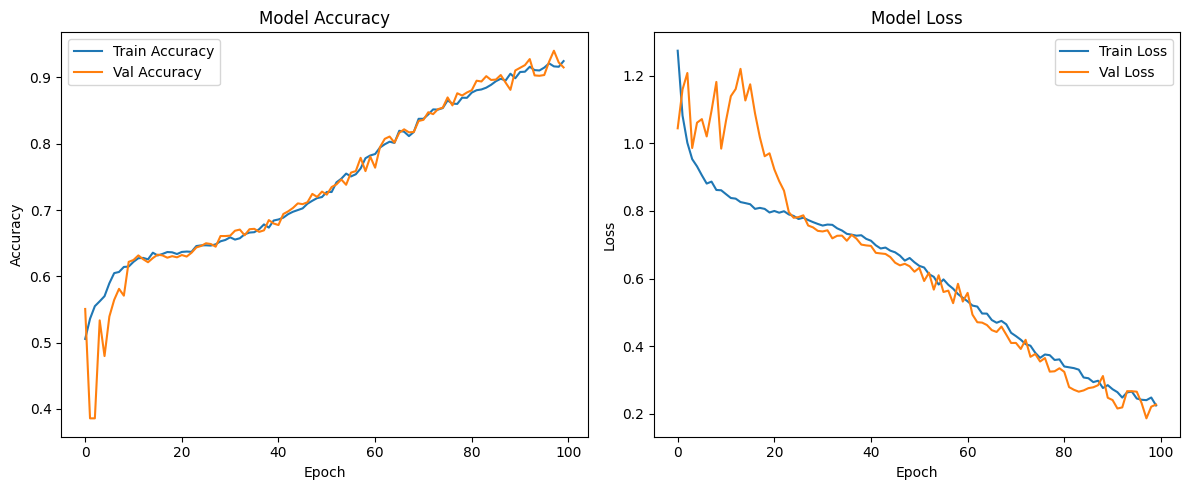

In [239]:
from src.utils.plot import plot_training

plot_training(history)

In [240]:
from sklearn.metrics import classification_report
import numpy as np

# Assume you have:
# X_test: shape (num_samples, 15, 1) or (num_samples, 15, 1, 1)
# y_test: true labels, one-hot encoded (shape: [num_samples, num_classes])

# Step 1: Predict class probabilities
y_pred_probs = model.predict(X_test)

# Step 2: Convert predictions and true labels to class indices
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Step 3: Generate the report
original_class_names = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
print(classification_report(y_true, y_pred, target_names=original_class_names))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
              precision    recall  f1-score   support

        DOWN       0.89      0.98      0.93       672
       MIXED       0.94      0.74      0.83       400
          UP       0.93      0.95      0.94       673

    accuracy                           0.92      1745
   macro avg       0.92      0.89      0.90      1745
weighted avg       0.92      0.92      0.91      1745



In [ ]:
# Save
# model.save('models/cnn_1d_huge.keras')  # Best for TF 2.x